<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/quality_date_dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Получите и загрузите данные
df = pd.read_csv('/content/drive/MyDrive/Проблема качества данных/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
#Модель 1
#Удаление категориальных переменных из признаков X
X = df.drop(columns=['PassengerId','Name','Sex','Ticket','Cabin','Embarked'])
#Удаление строк с пропущенными значениями (NaN) из признаков X  (в признаке Age много пропусков)
X = X.dropna()

y=X['Survived']
X = X.drop(columns=['Survived'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   714 non-null    int64  
 3   Parch   714 non-null    int64  
 4   Fare    714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [55]:
#Выберете и посчитайте метрику качества модели 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
print('Точность модели LogisticRegression score для тренировочного датасэта ',round(model.score(X_train, y_train),3))
print('Точность модели LogisticRegression score для тестового датасэта ',round(model.score(X_test,y_test),3))

Точность модели LogisticRegression score для тренировочного датасэта  0.713
Точность модели LogisticRegression score для тестового датасэта  0.699


In [62]:
from sklearn.metrics import classification_report

#процент определенных неутонувших составляет 84%, а утонувших всего 53% (recall)
predictions = model.predict(X_test)
target_names=['Не утонул','Утонул']
print(classification_report(y_test,predictions,target_names=target_names))

              precision    recall  f1-score   support

   Не утонул       0.69      0.84      0.75        79
      Утонул       0.72      0.53      0.61        64

    accuracy                           0.70       143
   macro avg       0.71      0.68      0.68       143
weighted avg       0.70      0.70      0.69       143



In [89]:
#Модель 2
#Проверьте данные на наличие пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


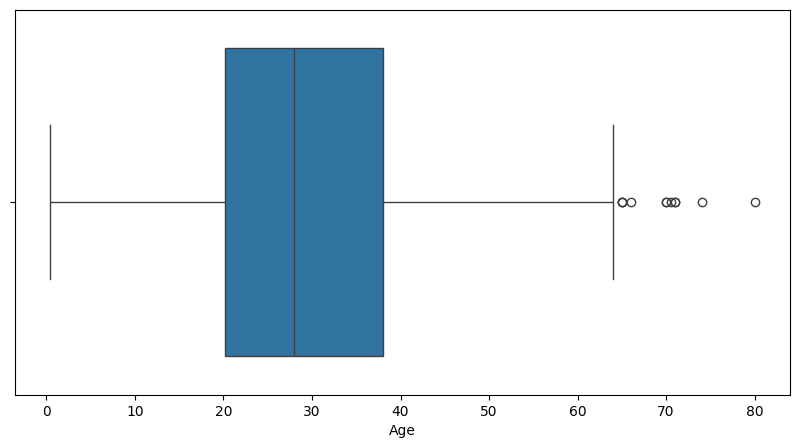

In [64]:
#Проверяем на наличие выбросов признак Age,  исходя из здравого смысла до 80 лет это реальный возраст, поэтому здесь данные не изменяем
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.show()

Text(0, 0.5, 'Название палубы')

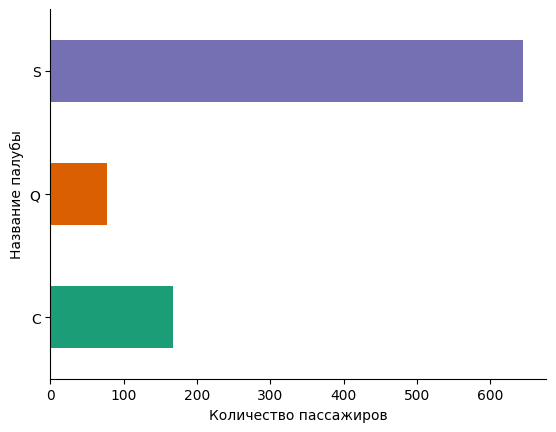

In [65]:
#визуально анализируем признак количество пассажиров по палубам
df.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Количество пассажиров")
plt.ylabel("Название палубы")

Text(0, 0.5, 'Классы 1 - не утонули, 2- утонули')

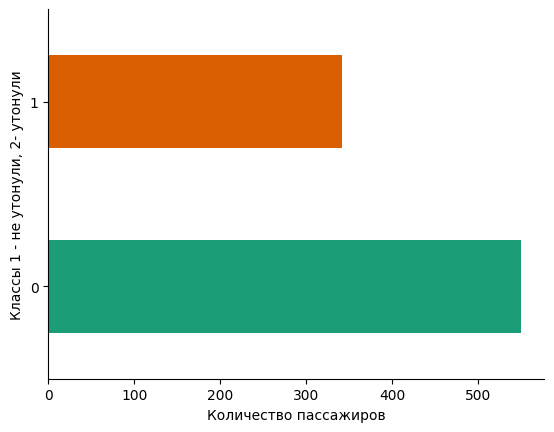

In [66]:
df.groupby('Survived').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Количество пассажиров")
plt.ylabel("Классы 1 - не утонули, 2- утонули")
#Видим, что классы сбалансированы

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

Если в признаках оставить Cabin и удалить пропуски, то будет потеряно 100-204/(891/100)=100-22=78%

Если оставить признак Age и удалить Cabin, затем удалить пропуски. В этом случае могло бы быть потеряно 100-714/(891/100)=100-80=20%

Удалим из признаков  PassengerId,	Name,	Ticket, 	Cabin
Переведем категориальные признаки 	Sex, Embarked (палуба)

Итого в качестве признаков для модели 2 оставим: Pclass, Sex,	Age, SibSp,	Parch, Fare, 	Embarked


In [90]:
X = pd.get_dummies(df, columns=['Sex','Embarked'],dtype=int) #работа с категориальными столбцами
#Удалим лишние столбцы
X = X.drop(columns=['PassengerId','Name','Ticket','Cabin'])
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [92]:
np.mean(X['Age'])#вычислим среднее Age

29.69911764705882

In [93]:
#Заполним NaN  в X['Age'] средним
X['Age'] = X['Age'].fillna(np.mean(X['Age']))
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [94]:
#Удалим две строки с NAN в Embarked так как это несущественное уменьшение в данных, менее 1%
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   Embarked_C  891 non-null    int64  
 9   Embarked_Q  891 non-null    int64  
 10  Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [95]:
y=X['Survived']
X = X.drop(columns=['Survived'])

In [96]:
#Выберете и посчитайте метрику качества модели 2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model2 = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model2.fit(X_train, y_train)
print('Точность модели LogisticRegression score для тренировочного датасэта ',round(model2.score(X_train, y_train),3))
print('Точность модели LogisticRegression score для тестового датасэта ',round(model2.score(X_test,y_test),3))

Точность модели LogisticRegression score для тренировочного датасэта  0.802
Точность модели LogisticRegression score для тестового датасэта  0.799


In [97]:
from sklearn.metrics import classification_report

#процент определенных неутонувших составляет 84%, процент утонувших 74% recall
predictions = model2.predict(X_test)
target_names=['Не утонул','Утонул']
print(classification_report(y_test,predictions,target_names=target_names))

              precision    recall  f1-score   support

   Не утонул       0.84      0.84      0.84       110
      Утонул       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Исходя из сравнения метрик двух моделей очевидно, что более точная model2 с бОльшим количеством признаков.